In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
from google.colab import files
uploaded = files.upload()

In [28]:
#so we have two files for training the model and two files for testing it
# _X means it contains the images
# _label means it contains the correct name of the class to which the image belongs

X_train=np.loadtxt('train_X.csv',delimiter=',').T
Y_train=np.loadtxt('train_label.csv',delimiter=',').T
X_test=np.loadtxt('test_X.csv',delimiter=',').T
Y_test=np.loadtxt('test_label.csv',delimiter=',').T

print(X_train.shape) #(784, 1000) means that i have 1000 images with 784 features each
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 1000)
(10, 1000)
(784, 350)
(10, 350)


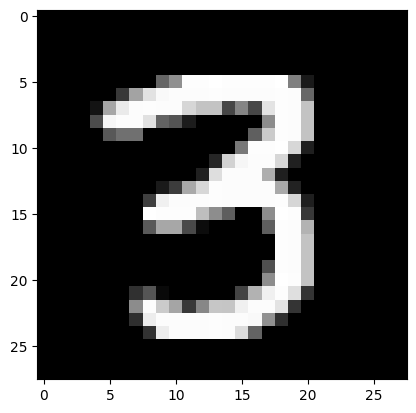

In [29]:
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28),cmap="gray")
plt.show()

In [30]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x,0)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX,axis=0)

In [31]:
def derivative_tanh(x):
  return (1-np.power(x,2))

def derivative_relu(x):
  return np.array(x>0,dtype=np.float32)

In [32]:
a=np.array([[1,-2,3],[1,4,-5]])
derivative_relu(a)

array([[1., 0., 1.],
       [1., 1., 0.]], dtype=float32)

In [33]:
 # initialise parameters

def initialize_parameters(n_x,n_h,n_y):
  w1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  w2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  parameters={
      'w1':w1,
      'b1':b1,
      'w2':w2,
      'b2':b2,
  }
  return parameters

In [34]:
 # forward propogation

def forward_propogation(x,parameters):
  w1=parameters['w1']
  b1=parameters['b1']
  w2=parameters['w2']
  b2=parameters['b2']

  z1=np.dot(w1,x)+b1
  a1=relu(z1)

  z2=np.dot(w2,a1)+b2
  a2=softmax(z2)

  forward_cache={
      'z1':z1,
      'a1':a1,
      'z2':z2,
      'a2':a2,
  }
  return forward_cache

In [35]:
def cost_function(a2,y):
  m = y.shape[1]
  cost = -(1/m)*np.sum(y*np.log(a2))
  # cost=(-1/m)*np.sum(np.sum(y*np.log(a2,0),1)) an also be used. a2,0 means rowwise summation and ,1 means columnwise
  return cost

In [42]:
def back_propogation(parameters,forward_cache,x,y):
  w1=parameters['w1']
  b1=parameters['b1']
  w2=parameters['w2']
  b2=parameters['b2']

  a2=forward_cache['a2']
  a1=forward_cache['a1']

  m=x.shape[1]

  dz2=a2-y
  dw2=1/m*np.dot(dz2,a1.T)
  db2=1/m*np.sum(dz2,axis=1,keepdims=True) # column wise summation

  dz1=np.dot(w2.T,dz2)*derivative_relu(a1)
  dw1=(1/m)*np.dot(dz1,x.T)
  db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)

  grads={
      'dw1':dw1,
      'db1':db1,
      'dw2':dw2,
      'db2':db2,
  }
  return grads


In [37]:
def update_parameters(grads,parameters,learning_rate):
  w1=parameters['w1']
  b1=parameters['b1']
  w2=parameters['w2']
  b2=parameters['b2']
  dw1=grads['dw1']
  db1=grads['db1']
  dw2=grads['dw2']
  db2=grads['db2']

  w1=w1-learning_rate*dw1
  b1=b1-learning_rate*db1
  w2=w2-learning_rate*dw2
  b2=b2-learning_rate*db2

  parameters={
      'w1':w1,
      'b1':b1,
      'w2':w2,
      'b2':b2,
  }
  return parameters

In [48]:
# compute model

def model(x,y,n_h,iterations):
  n_x=x.shape[0]
  n_y=y.shape[0]
  cost_list=[]
  parameters=initialize_parameters(n_x,n_h,n_y)

  for i in range(iterations):
    forward_cache=forward_propogation(x,parameters)
    cost=cost_function(forward_cache['a2'],y)
    grads=back_propogation(parameters,forward_cache,x,y)
    parameters=update_parameters(grads,parameters,0.005)
    cost_list.append(cost)

    if(i%(iterations/10)==0):
      print("cost after iteration %i: %f" %(i,cost))

  return parameters,cost_list

In [49]:
iterations=100
n_h=1000
Parameters,Cost_list=model(X_train,Y_train,n_h,iterations)

cost after iteration 0: 6.964749


/tmp/ipython-input-35-3054720132.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(a2))
/tmp/ipython-input-35-3054720132.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(a2))


cost after iteration 10: 0.414620
cost after iteration 20: 0.162219
cost after iteration 30: 0.081859
cost after iteration 40: 0.046311
cost after iteration 50: 0.031707
cost after iteration 60: 0.023762
cost after iteration 70: 0.018761
cost after iteration 80: 0.015358
cost after iteration 90: 0.012940


<function matplotlib.pyplot.show(close=None, block=None)>

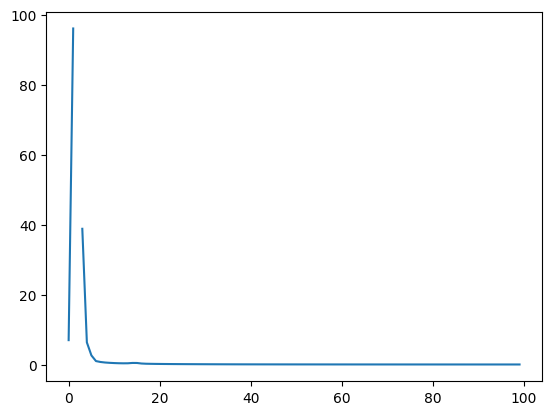

In [50]:
t=np.arange(0,iterations)
plt.plot(t, Cost_list)
plt.show

In [61]:
def accuracy(inp,labels,parameters):
  forward_cache=forward_propogation(inp,parameters)
  a_out=forward_cache['a2']
  a_out=np.argmax(a_out,axis=0)
  y_out=np.argmax(labels,axis=0)
  return np.mean(a_out==y_out)*100

print("Accuracy of training set:", accuracy(X_train,Y_train,Parameters))
print("Accuracy of test set:", accuracy(X_test,Y_test,Parameters))

Accuracy of training set: 100.0
Accuracy of test set: 89.14285714285714


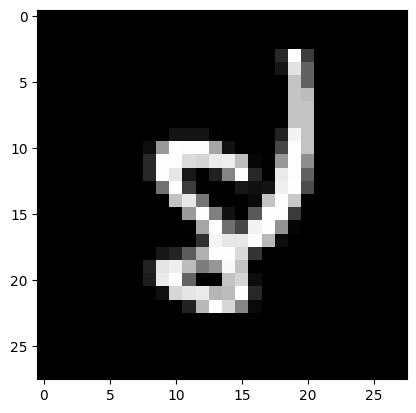

8


In [69]:
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28),cmap="gray")
plt.show()

forward_cache=forward_propogation(X_train[:,index].reshape(X_test.shape[0],1),Parameters)
a_out=forward_cache['a2']
print(np.argmax(a_out))


In [3]:
!cp Handwritten_Digit_Recognition.ipynb /content/

cp: cannot stat 'Handwritten_Digit_Recognition.ipynb': No such file or directory


In [4]:
!cp "Handwritten_Digit_Recognition.ipynb" /content/


cp: cannot stat 'Handwritten_Digit_Recognition.ipynb': No such file or directory
